In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [25]:
iris = load_iris()

In [26]:
X = iris.data[:, (2,3)]
print(X.shape)
y = (iris.target == 0).astype(np.int)
print(y)

(150, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/tmp/ipykernel_2505987/3683177698.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [27]:
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict(X)

In [28]:
per_clf.score(X, y)

1.0

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [54]:
fasion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fasion_mnist.load_data()

In [32]:
X_train_full.shape

(60000, 28, 28)

In [33]:
X_train_full.dtype

dtype('uint8')

In [55]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 #scale data correctly
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [35]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [36]:
class_names[y_train[0]]

'Coat'

T-shirt/top


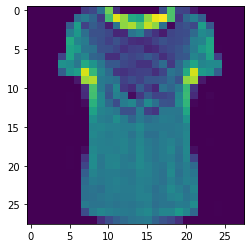

In [37]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])
print(class_names[y_train[1]])

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2022-05-06 11:05:37.935081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 11:05:37.959812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 11:05:37.960003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 11:05:37.960838: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax"),
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [42]:
hidden1 = model.layers[1]

In [43]:
weights, biases = hidden1.get_weights()

In [44]:
weights

array([[ 0.0550514 ,  0.03201308,  0.01040231, ...,  0.02172329,
         0.04886823,  0.06900801],
       [-0.00182801, -0.07359655, -0.0485511 , ..., -0.00053719,
         0.00794818, -0.00903469],
       [-0.02855795, -0.06493848,  0.03292098, ..., -0.05487555,
        -0.02214709,  0.01206321],
       ...,
       [ 0.02828436, -0.04454326,  0.01523169, ...,  0.05636655,
        -0.00978663,  0.0625935 ],
       [ 0.05627137, -0.01777051,  0.03610983, ..., -0.07010791,
         0.02922909,  0.03308422],
       [ 0.06795017, -0.04336604, -0.06413948, ..., -0.05607725,
        -0.03897076,  0.02937023]], dtype=float32)

In [45]:
weights.shape

(784, 300)

In [46]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
biases.shape

(300,)

In [48]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [49]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7140 - accuracy: 0.7649 - val_loss: 0.5202 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4875 - accuracy: 0.8294 - val_loss: 0.4396 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4410 - accuracy: 0.8452 - val_loss: 0.4072 - val_accuracy: 0.8626
Epoch 4/30
1719/1719 [==============================] - 2s 994us/step - loss: 0.4141 - accuracy: 0.8552 - val_loss: 0.3923 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3930 - accuracy: 0.8629 - val_loss: 0.3772 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3790 - accuracy: 0.8667 - val_loss: 0.3772 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3640 - accuracy: 0.8718 - val_loss: 0.3567 - val_accurac

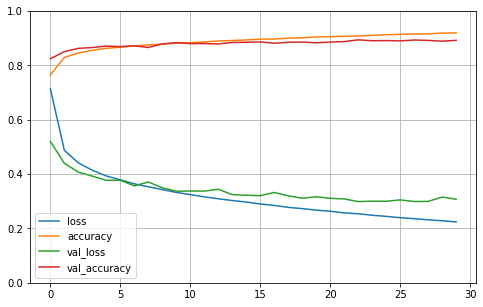

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5)) #make plt instance!
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 843us/step - loss: 0.3350 - accuracy: 0.8770


[0.33501720428466797, 0.8769999742507935]

In [57]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
print(y_prob)

[[7.1728908e-07 1.6101326e-06 1.6179782e-06 3.1665909e-06 1.4497641e-06
  3.5791218e-02 1.0013604e-05 1.9693142e-02 4.7478400e-04 9.4402224e-01]
 [2.0303256e-05 2.9584364e-09 9.9750274e-01 1.2127588e-06 2.2723372e-03
  2.8663005e-12 2.0298388e-04 3.7365036e-10 5.0491514e-07 3.6523902e-11]
 [4.3970223e-07 9.9999893e-01 1.1724078e-09 3.7451454e-07 2.1096139e-07
  1.0477362e-11 4.1510004e-09 4.3202020e-10 8.5590726e-09 3.4571304e-12]]


In [58]:
y_pred = np.argmax(y_prob, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit using X_train!
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [60]:
X_train.shape

(11610, 8)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(1),
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7727 - val_loss: 0.5416
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5112 - val_loss: 0.4974
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4841 - val_loss: 0.4634
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5028 - val_loss: 0.4557
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4506 - val_loss: 0.4436
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4426 - val_loss: 0.4364
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4484 - val_loss: 0.4279
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4297 - val_loss: 0.4202
Epoch 9/20
363/363 [==============================] - 0s 999us/step - loss: 0.4170 - val_loss: 0.4160
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4144 - val_loss: 0.41

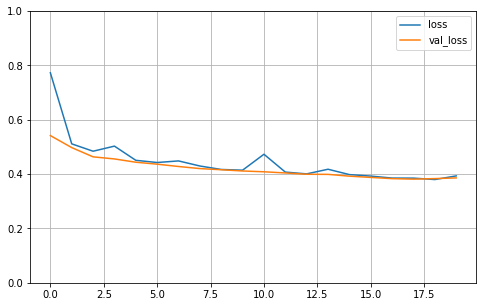

In [62]:

pd.DataFrame(history.history).plot(figsize=(8,5)) #make plt instance!
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [105]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate(axis=1)([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.Model(inputs=[input_], outputs=[output])

Epoch 1/20
  1/363 [..............................] - ETA: 54s - loss: 4.1734

/home/dongho/.local/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 1.7500 - val_loss: 0.7443
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6987 - val_loss: 0.6559
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6200 - val_loss: 0.6091
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5797 - val_loss: 0.5736
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5503 - val_loss: 0.5461
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5269 - val_loss: 0.5251
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5092 - val_loss: 0.5096
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4957 - val_loss: 0.4978
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4846 - val_loss: 0.4867
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4758 - val_loss: 0.4797
Epoch 11/2

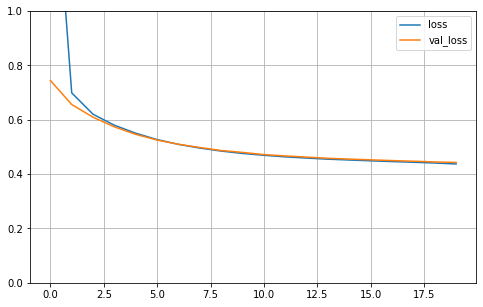

In [106]:
model1.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model1.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model1.predict(X_new)
pd.DataFrame(history.history).plot(figsize=(8,5)) #make plt instance!
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [72]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat=keras.layers.concatenate([input_A, hidden_2])
output= keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])


In [76]:

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-2))
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]

history = model.fit((X_train_A,X_train_B), y_train, epochs=20, validation_data=((X_valid_A,X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5032 - val_loss: 0.4960
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5542 - val_loss: 0.4680
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4556 - val_loss: 0.4530
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 0.4442
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4365 - val_loss: 0.4384
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4275 - val_loss: 0.4287
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4170 - val_loss: 0.4226
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4106 - val_loss: 0.4206
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4077 - val_loss: 0.4286
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3993 - val_loss: 0.4138

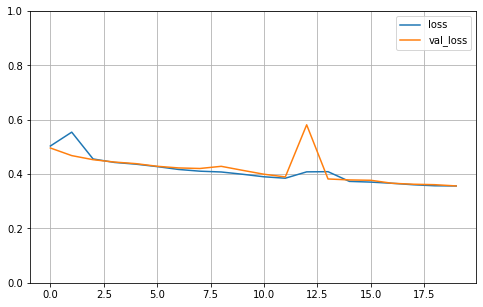

In [77]:
pd.DataFrame(history.history).plot(figsize=(8,5)) #make plt instance!
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [87]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat=keras.layers.concatenate([input_A, hidden_2])
output= keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden_2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


In [88]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9,0.1], optimizer="sgd") #loss_weights is the weight for thw losses!

In [89]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B],[y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1548 - main_output_loss: 1.0123 - aux_output_loss: 2.4377 - val_loss: 0.6611 - val_main_output_loss: 0.5911 - val_aux_output_loss: 1.2917
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7567 - main_output_loss: 0.7146 - aux_output_loss: 1.1350 - val_loss: 0.5645 - val_main_output_loss: 0.5059 - val_aux_output_loss: 1.0917
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5552 - main_output_loss: 0.5040 - aux_output_loss: 1.0163 - val_loss: 0.5371 - val_main_output_loss: 0.4848 - val_aux_output_loss: 1.0071
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5259 - main_output_loss: 0.4794 - aux_output_loss: 0.9441 - val_loss: 0.5217 - val_main_output_loss: 0.4759 - val_aux_output_loss: 0.9339
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5066 - main_output_loss: 0.4657 - aux_output_loss: 0.8747 - val_loss

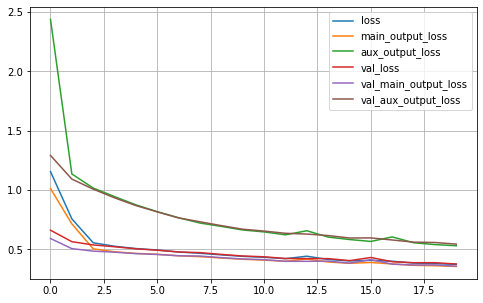

In [90]:
pd.DataFrame(history.history).plot(figsize=(8,5)) #make plt instance!
plt.grid(True)
plt.show()

In [84]:
total_loss, main_loss ,aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 966us/step - loss: 0.3763 - main_output_loss: 0.3614 - aux_output_loss: 0.5104


In [85]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kargs):
        super().__init__(**kargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        pass
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden_1 = self.hidden1(input_B)
        hidden_2 = self.hidden2(hidden_1)
        concat = keras.layers.concatenate([input_A, hidden_2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()
        

In [91]:
model.save("my_keras_model.h5")

In [93]:
model = keras.models.load_model("my_keras_model.h5")

In [97]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
#history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [98]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
#history = model.fit(X_train, y_train, epochs=10, validation_data = [X_valid, y_valid], callbacks=[checkpoint_cb])

In [99]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) #stop the model from fitting in an unnecessary times, restore best params!
#history = model.fit(X_train, y_train, epochs=100, validation_data = [X_valid, y_valid], callbacks=[checkpoint_cb, early_stopping_cb]) # we can put in more than one callbacks!

In [100]:
# we can make our own callbacks!
class PrintValTrainRatioCallback(keras.callbacks.Callback): #our own callback!
    def on_epoch_end(self, epoch, logs): #function overwriting!
        print("\n val/train: {:.2f}", format(logs["val_loss"])/logs["loss"])

## Tensor board!

In [101]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [102]:
run_logdir = get_run_logdir()

In [104]:
run_logdir

'./my_logs/run_2022_05_08-18_10_24'

In [115]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3683 - val_loss: 0.3717
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3676 - val_loss: 0.3716
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 0.3707
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.3705
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3652 - val_loss: 0.3704
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3651 - val_loss: 0.3682
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3641 - val_loss: 0.3676
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3633 - val_loss: 0.3676
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3628 - val_loss: 0.3662
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3619 - val_loss: 0.3675

In [111]:
%load_ext tensorboard

In [114]:
tensorboard --logdir=./my_logs --port=6008 --bind_all